
# <font color="red"> Ejercicio: Red Neuronal para convertir grados Celsius a Fahrenheit </font>

## <font color="blue"> Por Alfredo Alfredo Diaz </font>

En este ejercicio vamos a construir una red neuronal simple para convertir grados Celsius a Fahrenheit. Sabemos que la fórmula de conversión es:

$$Fahrenheit = (Celsius \times 1.8) + 32$$

El modelo de red neuronal (RNA) tomará los grados Celsius como entrada, multiplicará por un peso de la conexión (que aprenderá durante el entrenamiento) y sumará un sesgo para generar el valor de Fahrenheit.

El objetivo es entrenar una red neuronal para que aprenda esta conversión.

Resultado = (GradosCelsius * Peso) + Sesgo

[Calculadora de grados](https://www.digikey.com/es/resources/conversion-calculators/conversion-calculator-temperature)

![imagen](https://i.ytimg.com/vi/H3q6Wm0nTZ4/maxresdefault.jpg)

##Importación de bibliotecas

In [4]:
# Importamos las bibliotecas necesarias
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input

In [1]:
!python --version

Python 3.12.12


In [5]:
print(tf.__version__)

2.19.0


In [6]:
print(tf.keras.__version__)

3.10.0


In [7]:
!ls -la

total 16
drwxr-xr-x 1 root root 4096 Feb  6 14:31 .
drwxr-xr-x 1 root root 4096 Feb 20 20:07 ..
drwxr-xr-x 4 root root 4096 Feb  6 14:31 .config
drwxr-xr-x 1 root root 4096 Feb  6 14:31 sample_data


In [8]:
!pip list|grep keras

keras                                    3.10.0
keras-hub                                0.21.1
keras-nlp                                0.21.1
tf_keras                                 2.19.0


##Generación de datos de entrenamiento

In [9]:
celsius = np.array([-35,-30, -20,-10, -5, 0, 10, 15, 20, 25, 35,40], dtype=float)
fahrenheit = celsius * 1.8 + 32
fahrenheit

array([-31., -22.,  -4.,  14.,  23.,  32.,  50.,  59.,  68.,  77.,  95.,
       104.])

In [10]:
celsius, fahrenheit

(array([-35., -30., -20., -10.,  -5.,   0.,  10.,  15.,  20.,  25.,  35.,
         40.]),
 array([-31., -22.,  -4.,  14.,  23.,  32.,  50.,  59.,  68.,  77.,  95.,
        104.]))

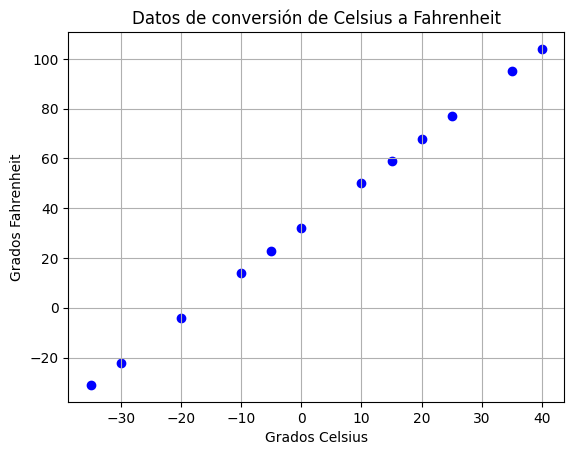

In [11]:
# Visualizamos los datos de entrada y salida
plt.scatter(celsius, fahrenheit, color='blue')
plt.title('Datos de conversión de Celsius a Fahrenheit')
plt.xlabel('Grados Celsius')
plt.ylabel('Grados Fahrenheit')
plt.grid(True)
plt.show()

#Preprocesamiento de los datos

**No es necesario preprocesar los datos en este caso, ya que son simples valores numéricos calculados por fórmula.**
Pero, si fuera necesario, podríamos escalar los datos para mejorar el entrenamiento.

Para este ejemplo, simplemente vamos a proceder con los valores tal como están.


#Creación del modelo de red neuronal

* Para aplicar redes neuronales, vamos a utilizar la librería Keras, que nos facilita el desarrollo de modelos de redes neuronales de manera sencilla. En este caso, vamos a crear una variable llamada layer de tipo Layer en Keras. Las capas densas son aquellas en las que cada neurona está conectada con todas las neuronas de la siguiente capa. En este modelo, tenemos dos capas: un tensor de entrada y otra con una neurona de salida. Al definir la capa, pasamos como parámetro units, que representa el número de neuronas en la capa de salida (en este caso, 1). Además, usamos el parámetro **input_shape** con valor 1, ya que tenemos un solo Tensor (celsius) de entrada.

* A continuación, creamos una variable de objeto llamada model de tipo Sequential en Keras para agrupar y organizar las capas. El modelo Sequential es el más sencillo y se utiliza para redes neuronales en las que las capas se apilan una sobre otra de forma lineal. Para redes más complejas, existen otros tipos de modelos.

* Después de definir el modelo, es necesario compilarlo para que pueda ser entrenado. Para ello, se pasan dos parámetros:

* **optimizer**: Aquí usamos el algoritmo Adam, que ayuda a que la red neuronal aprenda de manera eficiente, ajustando los pesos y sesgos para mejorar la predicción con cada iteración. La tasa de aprendizaje (learning rate) es un valor clave que determina qué tan grande es el ajuste de los pesos y sesgos en cada paso. En general, la tasa de aprendizaje se elige mediante prueba y error, pero un buen punto de partida es un valor pequeño, como 0.1 o 0.01. Si el valor es muy pequeño, el ajuste será muy lento; si es muy grande, la red puede no converger correctamente y no aprender bien.

* **loss function**: Usamos la función de pérdida mean_squared_error (error cuadrático medio). Esta función penaliza los errores grandes de manera más severa que los pequeños, lo que significa que una pequeña cantidad de errores grandes es peor que muchos errores pequeños.


In [12]:
# Fijar la semilla pseudoaleatoria para TensorFlow
tf.random.set_seed(42)

In [13]:

# Creamos el modelo de red neuronal con Input() como la capa de entrada
optmizador = tf.keras.optimizers.Adam(learning_rate=0.3)
model = tf.keras.Sequential([
    Input(shape=(1,)),  # Define la forma de entrada como un solo valor
    tf.keras.layers.Dense(1)  # Capa densa con 1 neurona de salida
])

# Compilamos el modelo con el optimizador 'adam' y la función de pérdida 'mean_squared_error'
model.compile(optimizer=optmizador, loss='mean_squared_error')

#Pruebe modificando el optimzador, solo poner optimizer='adam'

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

#Entrenamiento del modelo
Luego creamos el historial, le pasamos la lista de entrada y de salida, las vueltas (iteraciones) y verbose=false para que no imprima cosas que no necesitamos

In [15]:
print("Comienza entrenamiento..")
history = model.fit(celsius, fahrenheit, epochs=1000, verbose=True)
print("Modelo entrenado!")

#Pruebe poniendo verbose=False, menos epochs.

Comienza entrenamiento..
Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step - loss: 1383.6805
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1134.2936
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 991.5728
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 944.0453
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 959.3322
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 989.0568
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 996.7896
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 974.1134
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 930.6747
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 880.9617
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 837.3301
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 807.0714
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 791.3879
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 785.9709
Epoch 15/1000
1

#Visualizar la función de pérdida

Después, usamos matplotlib para poder graficar el comportamiento de aprendizaje de la red en base a las vueltas y las capas. Podemos observar que la red necesitó unas 400 vueltas aprox para encontrar el algoritmo óptimo para el problema.

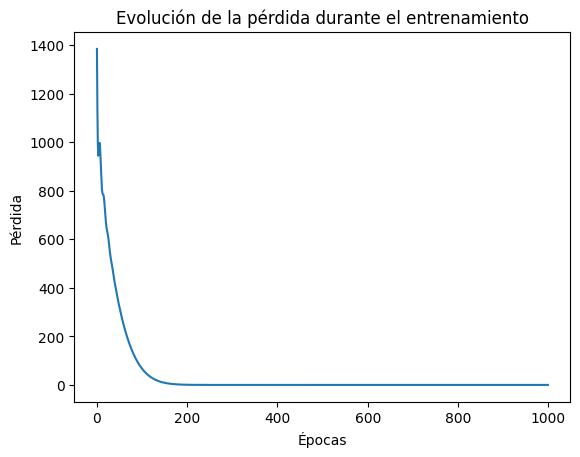

In [16]:
# Visualizamos la evolución de la pérdida durante el entrenamiento
plt.plot(history.history['loss'])
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()

In [18]:
print("Prección 1")
result = model.predict(np.array([16,-5,14,0]))
print("El resultado es" + str(result) + " fahrenheit.")

Prección 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
El resultado es[[60.800003]
 [23.000004]
 [57.200005]
 [32.000004]] fahrenheit.


In [19]:
#Mostar los pesos y el bias
print(model.get_weights())

[array([[1.8]], dtype=float32), array([32.000004], dtype=float32)]


#Evaluar gráficamente el modelo con los datos reales

In [ ]:
# Evaluamos el modelo con los mismos datos de entrada para ver el rendimiento
predicciones = model.predict(celsius)

# Visualizamos las predicciones junto con los datos reales
plt.scatter(celsius, fahrenheit, color='blue', label='Datos reales')
plt.scatter(celsius, predicciones, color='red', label='Predicciones del modelo')
plt.title('Predicciones vs Datos reales')
plt.xlabel('Grados Celsius')
plt.ylabel('Grados Fahrenheit')
plt.legend()
plt.show()


In [ ]:
#salvar el modelo de keras llamdo model
model.save('model.keras')
